In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

Retrieving data from superbooking table

In [40]:
superbooking=readSQL("""select * from superbooking where dayinweek <>0""")
superbooking['clientdate']=superbooking['client']+superbooking['date']
nbappts=len(superbooking)
superbooking.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate',
       ...
       'x8_BECKY', 'x8_HOUSE', 'x8_JJ', 'x8_JOANNE', 'x8_KELLY', 'x8_NA',
       'x8_SINEAD', 'x8_TANYA', 'visit', 'clientdate'],
      dtype='object', length=297)

In [2]:
superbooking[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

,visit,firstapp,newcustomer,noshowflag,multipleappt,latecancellation
count,1799.0,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,1.0,0.509728,0.493052,0.080044,0.240689,0.046693
std,0.0,0.500044,0.500091,0.271437,0.427621,0.211038
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


various statistics

In [3]:
nbcustomers=len(superbooking['client'].unique())
avgapptday=len(superbooking)/len(superbooking['clientdate'].unique())
a,b,c=superbooking['noshowflag'].sum(),superbooking['latecancellation'].sum(),superbooking['visit'].sum()
print(['distinct customers',nbcustomers,'nb appts',c,'total noshows',a,'total late cancellations',b,a-b,((a-b)/a),(b/a)],avgapptday)

['distinct customers', 800, 'nb appts', 1799, 'total noshows', 144, 'total late cancellations', 84, 60, 0.4166666666666667, 0.5833333333333334] 1.1621447028423773


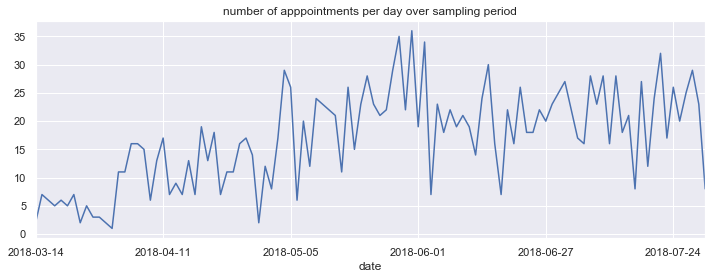

In [31]:
df=superbooking.copy()
df2=df.set_index(df['date'])
plt.figure(figsize=(12,4))
plt.title("number of apppointments per day over sampling period")
df2['visit'].groupby(['date']).sum().plot.line()

Number of one time customers /recurring customers

In [160]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) = 1 order by visit desc"""
dfone=readSQL(query)
nbonetime=len(dfone)
nbonetime

457

In [163]:
superone=pd.merge(superbooking,dfone['client'],on='client',how='inner')
superone[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()
superone['clientdate']=superone['client']+superone['date']
len(superone)

519

In [165]:
len(superone['clientdate'].unique())

457

In [166]:
avgapptday=len(superone)/len(superone['clientdate'].unique())
a,b,c=superone['noshowflag'].sum(),superone['latecancellation'].sum(),superone['visit'].sum()
print([nbonetime,c,a,b,a-b,((a-b)/a),(b/a),avgapptday])

[457, 519, 34, 18, 16, 0.47058823529411764, 0.5294117647058824, 1.135667396061269]


In [34]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) > 1 order by visit desc"""
dfmulti=readSQL(query)
nbmulti=len(dfmulti)
supermulti=pd.merge(superbooking,dfmulti['client'],on='client',how='inner')
supermulti['clientdate']=supermulti['client']+supermulti['date']
supermulti[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

,visit,firstapp,newcustomer,noshowflag,multipleappt,latecancellation
count,1280.0,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,1.0,0.310937,0.310937,0.085938,0.250781,0.051562
std,0.0,0.463058,0.463058,0.280381,0.433632,0.221228
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
avgapptday=len(supermulti)/len(supermulti['clientdate'].unique())
a,b,c=supermulti['noshowflag'].sum(),supermulti['latecancellation'].sum(),supermulti['visit'].sum()
print([nbmulti,c,a,b,a-b,((a-b)/a),(b/a),avgapptday])

[343, 1280, 110, 66, 44, 0.4, 0.6, 1.1732355637030247]


number of customers having multiple visits ordered by visits done in studied period

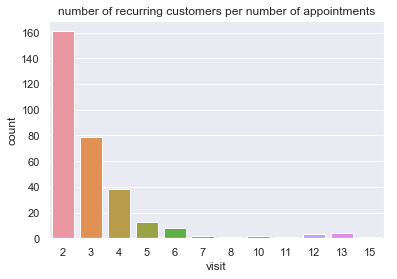

In [36]:
query="""select client,count(distinct date) visit from superbooking
where noshowflag =0
group by client having count(distinct date) > 1 order by visit desc"""
df=readSQL(query)
plt.title("number of recurring customers per number of appointments")
ax = sns.countplot(x="visit",data=df)

In [46]:
df=supermulti.copy()
df=df.loc[df.firstapp!=1,:]
#ax = sns.countplot(x="deltadaysappt",data=df)
len(df)

882

In [174]:
allcolumns=superbooking.columns
columnstoremove=['client', 'staff', 'service',
                'date', 'time', 'timeint', 'description','category',
                'canceldate', 'canceledby',
                'latecancellation', 'dayinweek', 'tdate', 'month', 'ttime', 'hour',
                'firstdate',  'lastnoshowdate',
       'lastnoshowhour', 'lastnoshowdayinweek', 'lastvisitdate',
       'lastvisithour', 'laststaff', 'lastvisitdayinweek', 'lastservice',
       'lastcategory',  'dayhourcombi', 'dayhourcount',
       'daycount', 'hourday', 'lastvisitdayhourcombi',
       'lastnoshowdayhourcombi', 'svcamt', 'lastsvcamt', 'svckey',
       'lastsvckey', 'lastservice2', 'lastcategory2', 'laststaff2','visit']
predictorlist = [x for x in allcolumns if x not in columnstoremove]
booking=superbooking[predictorlist].copy()

In [85]:
superclient=superbooking.groupby(['client','date'])
dftmp=superclient['noshowflag','visit'].sum()
dftmp=
#dftmp.loc[dftmpdftmp['noshowflag']==dftmp['noshowflag'],['visit']]

noshowflag  visit
client date                         
.L01   2018-05-23           0      2
?A01   2018-06-14           0      1
       2018-06-23           0      1
       2018-07-07           0      1
       2018-07-21           1      2
ABL*01 2018-05-17           0      1
       2018-06-22           0      1
       2018-07-07           1      1
       2018-07-24           0      1
ABLD01 2018-06-02           0      1
ADAP01 2018-06-28           0      2
AGOE01 2018-07-24           0      1
AINM01 2018-05-10           0      1
       2018-06-21           0      1
AITS01 2018-06-05           0      1
ALCV01 2018-06-07           1      2
       2018-06-12           0      3
ALIA01 2018-05-05           0      1
       2018-06-15           0      1
       2018-07-29           0      1
ALIR01 2018-04-21           0      1
ALIR02 2018-05-04           0      1
ALLM01 2018-04-13           0      1
       2018-07-21           0      1
ALVJ01 2018-05-01           0      1
       2018-07-04           0      1
ALZR01 2018-05-08           0      1
AMAB01 2018-07-27           1      1
AMAK01 2018-06-06           0      1
ANDE01 2018-06-06           0      1
...                       ...    ...
WRIM01 2018-07-12           0      1
WYRC01 2018-05-05           0      1
       2018-05-25           0      1
       2018-06-21           0      1
YAGL01 2018-07-14           0      1
YANC01 2018-06-15           0      1
       2018-07-17           0      1
YANJ01 2018-06-02           1      1
       2018-06-09           0      1
YANM01 2018-06-27           0      1
YATT01 2018-04-03           0      1
       2018-04-27           0      1
       2018-05-17           0      1
       2018-06-05           0      1
       2018-06-26           0      1
       2018-07-15           0      1
YEHC01 2018-06-28           0      1
YOUS01 2018-04-25           0      1
       2018-05-31           0      2
YUES01 2018-03-21           0      1
ZHAV01 2018-06-26           0      1
ZHIJ01 2018-04-29           0      1
ZIMJ01 2018-05-04           0      1
       2018-06-08           0      1
       2018-07-12           0      1
       2018-07-27           0      1
ZUGL01 2018-04-25           0      1
ZUKS01 2018-04-19           0      1
       2018-05-29           1      2
       2018-06-26           0      1

[1549 rows x 2 columns]

In [ ]:
plt.title("total bookings (including noshows) per employee")
ax = sns.countplot(x="staff",hue="noshowflag",data=df2)

In [37]:
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/bookingdescribe.xlsx"
booking2=booking[booking.newcustomer==1]
booking2.describe()
#booking.describe().to_excel(filepath)
#booking.describe()

,noshowflag,firstapp,newcustomer,deltadaysappt,last30dvisit,multipleappt,previousnoshow,last30dnoshow,last30dbillamt,last30dcolor,...,x7_SINEAD,x7_TANYA,x8_BECKY,x8_HOUSE,x8_JJ,x8_JOANNE,x8_KELLY,x8_NA,x8_SINEAD,x8_TANYA
count,888.000000,888.000000,888.0,888.0,888.0,888.000000,888.000000,888.000000,888.000000,888.0,...,888.000000,888.000000,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.0
mean,0.013514,0.970721,1.0,0.0,0.0,0.238739,0.029279,0.022523,0.036036,0.0,...,0.118243,0.011261,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.115525,0.168683,0.0,0.0,0.0,0.426553,0.168683,0.148459,1.073850,0.0,...,0.323078,0.105579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.000000,1.000000,1.0,0.0,0.0,1.000000,1.000000,1.000000,32.000000,0.0,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
final=booking.copy()

,noshowflag,newcustomer,deltadaysappt,last30dvisit,multipleappt,previousnoshow,last30dnoshow,last30dbillamt,last30dcolor,last30dstyle,...,x7_SINEAD,x7_TANYA,x8_BECKY,x8_HOUSE,x8_JJ,x8_JOANNE,x8_KELLY,x8_NA,x8_SINEAD,x8_TANYA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pyMechkar as mechkar

In [13]:
mechkar.pyMechkar().exploreData(data=final)

Directory  report  already exists
Directory  report  already exists


C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\moshe\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer